# Расчетная работа по курсу: Теория вероятности и статистика<br/>Раздел 2

## Импортируем все необходимые библиотеки

Здесь:
- Numpy (`numpy` или `np`) - общий модуль для работы с тензорами и статистических вычислений

- SciPy
    - `stats` - для получения функции плотности вероятности из модуля `norm`
    - `optimize` - для получения функции минимизации
    - `integrate` - для подсчета интеграла

- MatPlotLib (`matplotlib.pyplot` или `plt`) - для графиков

- Regex (`re`) - встроенный модуль для работы с регулярными выражениями

In [1]:
import numpy as np

from scipy import stats
from scipy import optimize
import scipy.integrate as integrate

import matplotlib.pyplot as plt

import re

## Вводим данные по варианту и `SEED` для повторяемости результатов
Функция плотности распределения:
$$\displaystyle
    f(x)=\begin{cases}
        \dfrac{1}{a} \Big( 1-\dfrac{|x|}{a} \Big) & \text{, }|x| \le a \\
        0 & \text{, }|x|>a 
        \end{cases}
$$

<br/><br/>Константы:
<br/>$a=2$
<br/>$\alpha=0.05$
<br/>$\gamma=0.95$
<br/>$n=300$

<br/><br/>Где:
<br/>$a$ - параметр для функции плонтности распределения
<br/>$\alpha$ - уровень значимости
<br/>$\gamma$ - доверительный интервал
<br/>$n$ - объем выборки

In [2]:
a = 2        # Параметр для функции распределения 
n = 300      # Объем выборки
ALPHA = 0.05 # Уровень значимости
GAMMA = 0.95 # Доверительный интервал

SEED = 0     # Для повторяемости результатов

## 2.0 Моделирование функции распределения и аналитический расчет параметров
Параметры: $MX$, $DX$, $F(x)$, $F^{-1}(u)$

### 2.0.1 Найдем $F(x)$ аналитически

Так как $F(x)$ вычисляется по формуле:
$$F(x)=\int_{-\infty}^{x}f(t)dt$$
То мы должны взять интеграл от кусочно-заданной функции.<br/>
При $x < -2 \Rightarrow F_X(x)=0$<br/><br/>
При $\displaystyle
        -2 \le x < 0 \Rightarrow F_X(x)
        =\int^x_{-2}\frac 12 (1 + \frac t2)dt
        =\frac 12 + \frac x2 + \frac{x^2}8
    $<br/><br/>
При $\displaystyle
        0 \le x \le 2 \Rightarrow F_X(x)
        =\int^0_{-2} \frac 12 (1 + \frac t2)dt + \int^x_0 \frac 12 (1 - \frac t2)dt
        =\frac 12 + \frac x2 - \frac{x^2}8
    $<br/><br/>
При $x > 2 \Rightarrow F_X(x)=1$<br/><br/><br/>
Тогда запишем $F_X(x)$:
$$
    F_X(x)=\begin{cases}
            0 & \text{, } x < -2 \\ \\
            \frac 12 + \frac x2 + \frac{x^2}8 & \text{, } -2 \le x < 0 \\ \\
            \frac 12 + \frac x2 - \frac{x^2}8 & \text{, } 0 \le x \le 2 \\ \\
            1 & \text{, } x > 2
            \end{cases}
$$

#### Запишем функции

In [3]:
def f(x):
    if abs(x) > a:
        return 0
    else:
        return (1 - abs(x) / a) / a

In [4]:
def F(x):
    if x < -2:
        return 0
    elif -2 <= x < 0:
        return 0.5 + 0.5 * x + 0.125 * x**2
    elif 0 <= x <= 2:
        return 0.5 + 0.5 * x - 0.125 * x**2
    else:
        return 1

#### График функции плотности распределения

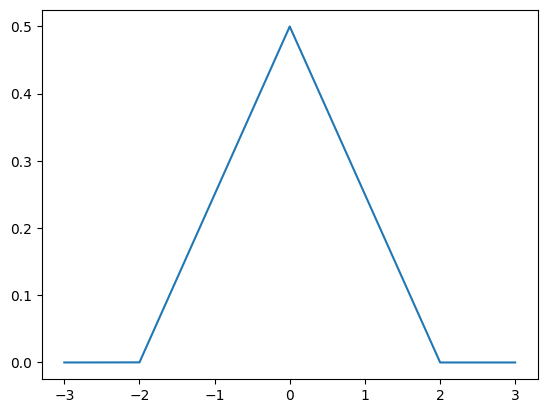

In [5]:
x = np.linspace(-3, 3, 100_000)
y = [f(val) for val in x]
plt.plot(x, y)
plt.show()

#### График функции распределения
Проверяем что функция стыкуется с помощью графика

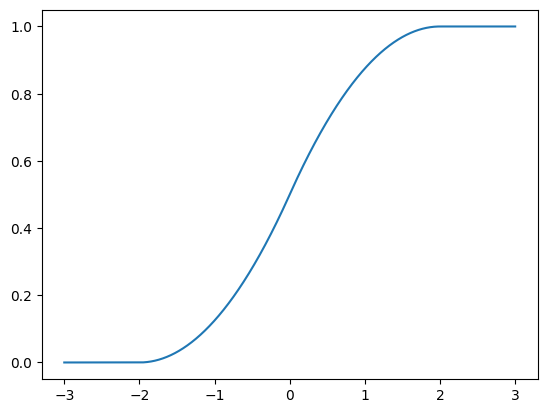

In [6]:
x = np.linspace(-3, 3, 100_000)
y = [F(val) for val in x]
plt.plot(x, y)
plt.show()

### 2.0.2 Найдем $F^{-1}(u)$ аналитически

Для нахождения $F^{-1}$ от кусочно-заданной функции необходимо рассмотреть интервалы по отдельности:
#### $x \in [-2,0)$
На интервале $x \in [-2,0)$ $y$ принимает значения $\Big[0, \dfrac 12\Big)$<br/>
Тогда на $y \in \Big[0, \dfrac 12\Big)$ решаем $y=\dfrac 12 + \dfrac x2 + \dfrac {x^2}8$ относительно $x$
$$\displaystyle
    y = \frac 18 (x^2 +4x) + \frac 12 
      = \frac 18 ((x + 2)^2 - 4) + \frac 12
      = \frac 18 (x + 2)^2
$$

$$\displaystyle
    y = \frac 18 (x + 2)^2 \Rightarrow x = \pm \sqrt{8y} - 2
$$
Следует выбрать + или - на основе интервалов, так чтобы при крайних значениях интервала для $y$ получались крайние значения интервала $x$.<br/><br/>
То есть, если рассмотрим "+" и подставим $y \in \Big[0, \dfrac 12\Big)$, то при подстановке в уравнение $x$ принимает $[-2,0)$. Это соответсвует изначальному (правильному интервалу $x \in [-2,0)$). При подставлении "-", этого не происходит $\Rightarrow$ берем "+"

#### $x \in [0,2]$
Действуем аналогично:<br/>
На интервале $x \in [0, 2]$ $y$ принимает значения $\Big[\dfrac 12, 1\Big]$<br/>

Решаем уравнение:
$$\displaystyle
    y = \frac 12 + \frac x2 - \frac {x^2}8
      = -\frac 18 (x^2 - 4x) + \frac 12
      = -\frac 18 ((x - 2)^2 - 4) + \frac 12
      = -\frac 18 (x - 2)^2 + 1
$$

$$\displaystyle
    y = -\frac 18 (x - 2)^2 + 1 \Rightarrow x = \pm \sqrt{8(1-y)} + 2
$$
После проверки интервалов, становиться очевидно что при $y \in \Big[\dfrac 12, 1\Big] \Rightarrow x = -\sqrt{8(1-y)} + 2$
<br/><br/>
Запишем найденную обратную функцию:
$$\displaystyle
    F^{-1}(u) = \begin{cases}
                \sqrt{8y} - 2 & \text{, } y \in [0, \frac 12) \\
                -\sqrt{8(1-y)} + 2 & \text{, } y \in [\frac 12, 1]
                \end{cases}
$$
Теперь запишем эту функцию в коде:

In [7]:
def invF(y: float) -> float | None:
    if 0 <= y < 0.5:
        return (8 * y)**0.5 - 2
    elif 0.5 <= y <= 1:
        return 2 - (8 * (1 - y))**0.5

#### График функции $F^{-1}(u)$

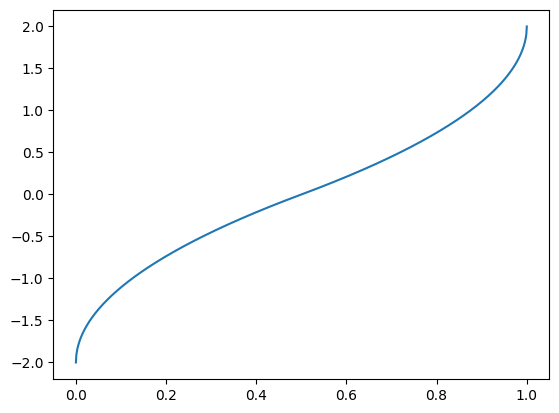

In [8]:
x = np.linspace(0, 1, 1000)
y = [invF(val) for val in x]
plt.plot(x, y)
plt.show()

### 2.0.3 Найдем MX и DX аналитически

Найдем MX:
$$\displaystyle
    MX = \int^2_{-2} xf(x)dx = \int^2_{-2} x \frac 12 (1 - \frac{|x|}2) dx = 0 
        \qquad \text{(так как} \quad x \frac 12 (1 - \frac{|x|}2) \quad \text{нечетная)}
$$
Найдем DX:
$$\displaystyle
    DX = MX^2 = \int^2_{-2} x^2 \frac 12 (1 - \frac{|x|}2) dx = 2 \int^2_{0} x^2 \frac 12 (1 - \frac{|x|}2) dx = \frac 23
$$

In [9]:
MX = 0
DX = 2 / 3
SIGMA = np.sqrt(DX)

### 2.0.4 Получим выборку случайной величины

#### С помощью `stats.uniform.rvs` получаем выборку равномерно распределенной случайной величины

In [10]:
uniform_selection = stats.uniform.rvs(size=n, random_state=SEED)

Далее на основе равномерно распределенной случайной величины строим выборку по полученной $F^{-1}(x)$

In [11]:
x = np.array([invF(val) for val in uniform_selection])

## 2.1 Построим гистограмму и сравним ее с $f(x)$

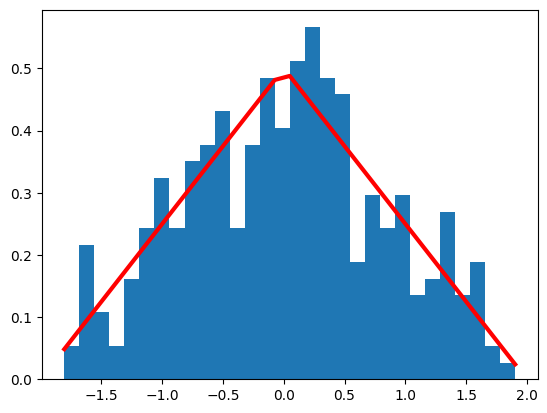

In [12]:
_, theoretic_x, _ = plt.hist(x, 30, density=True)

theoretic_distribution = [f(val) for val in theoretic_x]

plt.plot(theoretic_x, theoretic_distribution, linewidth=3, color='r')
plt.show()

## 2.2 Получим выборочные среднюю и дисперсию, то есть $\bar{X}$ и $S^2$

Для этого воспользуемся формулами:
$$\displaystyle
    \bar{X} = \frac 1n \sum^n_{i=1} x_i
$$

$$\displaystyle
    S^2 = \frac 1n \sum^n_{i=1} (x_i - \bar{X})^2
$$
Также для следущего задания мне потребуется выборочный центральный момент 4-го порядка, то есть $\mu^*_4$
$$\displaystyle
    \mu^*_4 = \frac 1n \sum^n_{i=1} (x_i - \bar{X})^4
$$

In [13]:
sample_average = x.sum() / n

sum_tmp = 0

for i in range(n):
    sum_tmp += (x[i] - sample_average) ** 2

sample_variance = sum_tmp / n

sum_tmp = 0

for i in range(n):
    sum_tmp += (x[i] - sample_average) ** 4

sample_variance_4 = sum_tmp / n

print(
    f"Выборочная средняя: {sample_average}\n" +
    f"Выборочная дисперсия: {sample_variance}\n" + 
    f"выборочный центральный момент 4-го порядка: {sample_variance_4}"
)

Выборочная средняя: 0.010635659634923031
Выборочная дисперсия: 0.6766911135122898
выборочный центральный момент 4-го порядка: 1.0870847081868134


## 2.3 Найдем точечную оценку параметра *a* методом моментов

Для нахождения точечной оценки методом моментов, необходимо найти MX и DX, но как функции зависимые от *a*
$$\displaystyle
    MX = \int^2_{-2} xf(x)dx = \int^2_{-2} \dfrac{x}{a} \Big( 1-\dfrac{|x|}{a} \Big) dx = 0 
        \qquad \text{(так как} \quad x \frac 12 \Big(1 - \frac{|x|}2\Big) \quad \text{нечетная)}
$$

$$\displaystyle
    DX = MX^2 = \int^2_{-2} \frac {x^2}a \Big(1 - \frac{|x|}a\Big) dx = 2 \int^2_{0}\frac {x^2}a \Big(1 - \frac{|x|}a\Big) dx
       = \frac{16}{3a} - \frac8{a^2}
$$

Третий момент равен нулю, так как функция получается нечетная. Тогда найдем 4-ый:
$$\displaystyle
    \mu_4 = MX^4 = \int^2_{-2} \frac {x^4}a \Big(1 - \frac{|x|}a\Big) dx = 2 \int^2_{0}\frac {x^4}a \Big(1 - \frac{|x|}a\Big) dx
       = \frac{64}{5a} - \frac{64}{3a^2}
$$
<br/><br/>
Теперь приравниваем DX и $S^2$, $\mu_4$ и $\mu^*_4$
$$\displaystyle
    \begin{cases}
        \dfrac{16}{3a} - \dfrac8{a^2} = 0.6767 \\ \\
        \dfrac{64}{5a} - \dfrac{64}{3a^2} = 1.0871
    \end{cases}
    \qquad \text{из решения} \Rightarrow a = 2.01
$$